In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from numpy import logical_and as npand
from numpy import logical_or as npor
import matplotlib

In [2]:
from sympy import (symbols, pi, I, E, cos, sin, exp, tan, simplify, expand, factor, collect,
                   apart, cancel, expand_trig, diff, Derivative, Function, integrate, limit,
                   series, Eq, solve, dsolve, Matrix, N, preorder_traversal, Float, solve_linear_system,
                   eye, zeros, lambdify)
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [3]:
init_vprinting()

In [4]:
h, fk, fc, fn, t = symbols('h f_k f_{k+1/2} f_{k+1} t')

h, fk, fc, fn, t

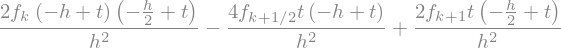

In [5]:
x_dot = 2/h**2*(t-h/2)*(t-h)*fk - 4/h**2*t*(t-h)*fc + 2/h**2*t*(t-h/2)*fn
x_dot

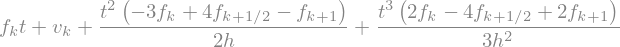

In [6]:
vk = symbols('v_k')
x = integrate(x_dot, t) + vk
x

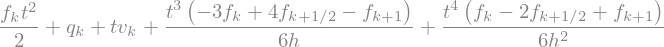

In [7]:
qk = symbols('q_k')
q = integrate(x, t) + qk
q

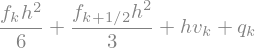

In [8]:
qn_exp = simplify(q.subs(t,h))
qn_exp

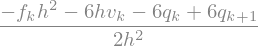

In [9]:
qn = symbols('q_{k+1}')
qn_eq = qn_exp - qn
fc_exp = simplify(solve(qn_eq, fc)[0])
fc_exp

$$ f_{k+1/2} = \frac{- f_{k} h^{2} - 6 h v_{k} - 6 q_{k} + 6 q_{k+1}}{2 h^{2}}$$

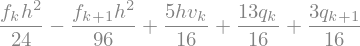

In [10]:
qc_expr = simplify(q.subs(t,h/2).subs(fc,fc_exp))
qc_expr

In [21]:
def legendre(taus, j):
    N = len(taus)
    L = 1
    i_range = [ii for ii in range(N)]
    i_range.pop(j)
    for i in i_range:
        L *= (t - taus[i])/(taus[j]-taus[i])
    return expand(L)

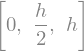

In [23]:
taus = [0, h/2, h]
taus

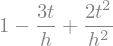

In [24]:
legendre(taus, 0)

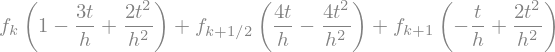

In [25]:
f_arr = [fk, fc, fn]
pol_f = 0
for ii in range(3):
    ff = f_arr[ii]
    pol_f+= ff*legendre(taus, ii)
pol_f

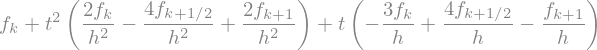

In [33]:
pol_f.expand().collect(t)

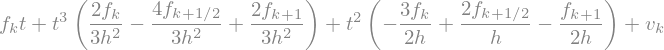

In [31]:
pol_v = pol_f.integrate(t).expand().collect(t) + vk
pol_v

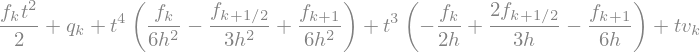

In [32]:
pol_q = pol_v.integrate(t).expand().collect(t) + qk
pol_q

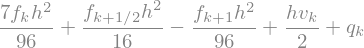

In [36]:
q_c_exp = pol_q.subs(t, h/2).simplify()
q_c_exp

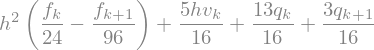

In [39]:
q_c_exp.subs(fc,fc_exp).collect(h)